In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, mean_absolute_error
from xgboost import XGBRegressor
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/miami-housing-dataset/miami-housing.csv


In [2]:
df =pd.read_csv("../input/miami-housing-dataset/miami-housing.csv")
df.head(10)

,LATITUDE,LONGITUDE,PARCELNO,SALE_PRC,LND_SQFOOT,TOT_LVG_AREA,SPEC_FEAT_VAL,RAIL_DIST,OCEAN_DIST,WATER_DIST,CNTR_DIST,SUBCNTR_DI,HWY_DIST,age,avno60plus,month_sold,structure_quality
0,25.891031,-80.160561,622280070620,440000.0,9375,1753,0,2815.9,12811.4,347.6,42815.3,37742.2,15954.9,67,0,8,4
1,25.891324,-80.153968,622280100460,349000.0,9375,1715,0,4359.1,10648.4,337.8,43504.9,37340.5,18125.0,63,0,9,4
2,25.891334,-80.153740,622280100470,800000.0,9375,2276,49206,4412.9,10574.1,297.1,43530.4,37328.7,18200.5,61,0,2,4
3,25.891765,-80.152657,622280100530,988000.0,12450,2058,10033,4585.0,10156.5,0.0,43797.5,37423.2,18514.4,63,0,9,4
4,25.891825,-80.154639,622280100200,755000.0,12800,1684,16681,4063.4,10836.8,326.6,43599.7,37550.8,17903.4,42,0,7,4
5,25.892060,-80.161354,622280070180,630000.0,9900,1531,2978,2391.4,13017.0,188.9,43135.1,38176.2,15687.2,41,0,2,4
6,25.892473,-80.157217,622280080100,1020000.0,10387,1753,23116,3277.4,11667.8,0.0,43598.7,37973.9,17068.2,63,0,2,5
7,25.893019,-80.157426,622280080400,850000.0,10272,1663,34933,3112.4,11718.1,10.5,43780.8,38198.3,16989.9,21,0,9,4
8,25.893046,-80.161556,622280080020,250000.0,9375,1493,11668,2081.8,13043.8,51.5,43481.7,38542.0,15623.3,56,0,3,4
9,25.893050,-80.158048,622280080370,1220000.0,13803,3077,34580,2937.7,11917.7,9.7,43730.1,38235.2,16787.0,63,0,11,5


In [3]:
miami_features = ["SALE_PRC","LND_SQFOOT", "TOT_LVG_AREA", "SPEC_FEAT_VAL", "RAIL_DIST", "OCEAN_DIST", "CNTR_DIST", "SUBCNTR_DI", "HWY_DIST", "structure_quality"]
df[miami_features].head(10)

,SALE_PRC,LND_SQFOOT,TOT_LVG_AREA,SPEC_FEAT_VAL,RAIL_DIST,OCEAN_DIST,CNTR_DIST,SUBCNTR_DI,HWY_DIST,structure_quality
0,440000.0,9375,1753,0,2815.9,12811.4,42815.3,37742.2,15954.9,4
1,349000.0,9375,1715,0,4359.1,10648.4,43504.9,37340.5,18125.0,4
2,800000.0,9375,2276,49206,4412.9,10574.1,43530.4,37328.7,18200.5,4
3,988000.0,12450,2058,10033,4585.0,10156.5,43797.5,37423.2,18514.4,4
4,755000.0,12800,1684,16681,4063.4,10836.8,43599.7,37550.8,17903.4,4
5,630000.0,9900,1531,2978,2391.4,13017.0,43135.1,38176.2,15687.2,4
6,1020000.0,10387,1753,23116,3277.4,11667.8,43598.7,37973.9,17068.2,5
7,850000.0,10272,1663,34933,3112.4,11718.1,43780.8,38198.3,16989.9,4
8,250000.0,9375,1493,11668,2081.8,13043.8,43481.7,38542.0,15623.3,4
9,1220000.0,13803,3077,34580,2937.7,11917.7,43730.1,38235.2,16787.0,5


In [4]:
from sklearn.model_selection import train_test_split

X = df[miami_features]
Y = df["SALE_PRC"]

X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state = 42, test_size = 0.20)

In [5]:
error_data = {}
for x in range(100,2000,100):
    forest_model = XGBRegressor(n_estimators=x)
    forest_model.fit(X_train, y_train)
    price_preds = forest_model.predict(X_test)
    error = mean_absolute_error(y_test, price_preds)
    error_data[x] = error
    print("Estimator:",x,"\nError: ",error)

Estimator: 100 
Error:  827.733057499103
Estimator: 200 
Error:  617.5980557050592
Estimator: 300 
Error:  576.3044015742734
Estimator: 400 
Error:  558.8670669626839
Estimator: 500 
Error:  552.2912630068174
Estimator: 600 
Error:  548.63686311446
Estimator: 700 
Error:  545.8340060997489
Estimator: 800 
Error:  544.9083047407606
Estimator: 900 
Error:  544.1686457212056
Estimator: 1000 
Error:  543.4299369842124
Estimator: 1100 
Error:  543.1706500044851
Estimator: 1200 
Error:  542.9782135809114
Estimator: 1300 
Error:  542.9040074452816
Estimator: 1400 
Error:  542.8636470667384
Estimator: 1500 
Error:  542.7883364729099
Estimator: 1600 
Error:  542.8161609705777
Estimator: 1700 
Error:  542.7854211517761
Estimator: 1800 
Error:  542.7591412136707
Estimator: 1900 
Error:  542.7513679583782


Text(0, 0.5, 'Mean error')

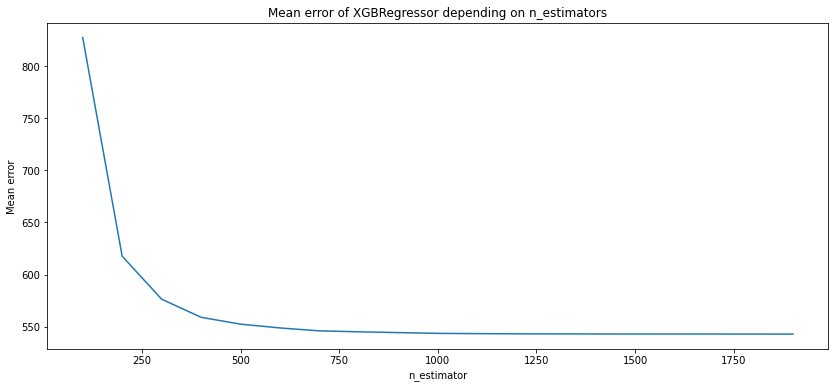

In [6]:
plt.figure(figsize=(14,6))
plt.title("Mean error of XGBRegressor depending on n_estimators")
sns.lineplot(data=error_data)
plt.xlabel("n_estimator")
plt.ylabel("Mean error")

In [7]:
forest_model = XGBRegressor(n_estimators=1000)
forest_model.fit(X_train, y_train)
price_preds = forest_model.predict(X_test)

In [8]:
error = mean_absolute_error(y_test, price_preds)
print("Estimator:",1000,"\nError: ",error)

Estimator: 1000 
Error:  543.4299369842124
